# Regression - Examples 1

## Estimating house prices. Using feature "crime" as the only fetaure (1 vble)

First of all, I import necessary modules

In [34]:
from numpy import arange,array,ones,linalg
import pandas
import matplotlib.pyplot as plt
#This way the plots appear in the notebook and not thrown as popups
%matplotlib inline

Global variables declaration

In [35]:
sourcefile = "Philadelphia_Crime_Rate_noNA.csv"
target='HousePrice'
features='CrimeRate'

Load csv with pandas (*PyTables, hdf5 or hdfs if very big files*)

In [36]:
sales = pandas.read_csv(sourcefile)

Prepare de matrixes (*ask about the ones row*) and calculate de parameters of the Linear Regression Model (slope and intercept)

In [37]:
xi = sales[features]
A = array([xi, ones(xi.size)])
y = sales[target]
w = linalg.lstsq(A.T, y)[0]
print("Linear regression model calculated for file %s.\n------------------------\nResults:" % (sourcefile))
print("Slope:\t\t%f" %(w[0]))
print("Intercept:\t%d" %(w[1]))
print("------------------------")

Linear regression model calculated for file Philadelphia_Crime_Rate_noNA.csv.
------------------------
Results:
Slope:		-576.908128
Intercept:	176629
------------------------


Plot as scatterplot the actual variables and as a green line the calculated linear regression model

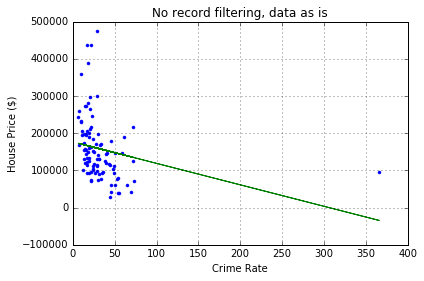

In [38]:
plt.plot(sales[features],sales[target],".",
         sales[features],w[1]+w[0]*sales[features],"g-",)
plt.xlabel('Crime Rate')
plt.ylabel('House Price ($)')
plt.title('No record filtering, data as is')
plt.grid(True)

#### Linear Regression filtering extreme case to gain precission

Linear regression model calculated for file Philadelphia_Crime_Rate_noNA.csv.
------------------------
Results:
Slope:		-2288.689430
Intercept:	225233
Note: Center City records filtered
------------------------


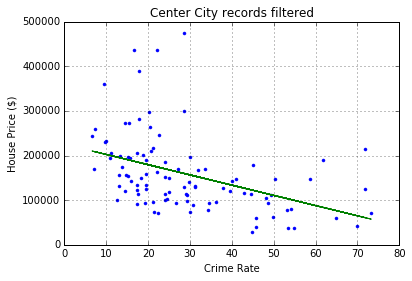

In [39]:
sales_noCC = sales[sales['MilesPhila'] != 0.0]
xi = sales_noCC[features]
A = array([xi, ones(xi.size)])
y = sales_noCC[target]
w = linalg.lstsq(A.T, y)[0]
print("Linear regression model calculated for file %s.\n------------------------\nResults:" % (sourcefile))
print("Slope:\t\t%f" %(w[0]))
print("Intercept:\t%d" %(w[1]))
print("Note: Center City records filtered")
print("------------------------")


plt.plot(sales_noCC[features],sales_noCC[target],".",
         sales_noCC[features],w[1]+w[0]*sales_noCC[features],"g-",)
plt.xlabel('Crime Rate')
plt.ylabel('House Price ($)')
plt.title('Center City records filtered')
plt.grid(True)
plt.show()

#### Linear Regression filtering extreme case and adjusting boundaries to gain precission

Linear regression model calculated for file Philadelphia_Crime_Rate_noNA.csv.
------------------------
Results:
Slope:		-1838.562649
Intercept:	199098
Note: Center City and houses > 350k$ records filtered
------------------------


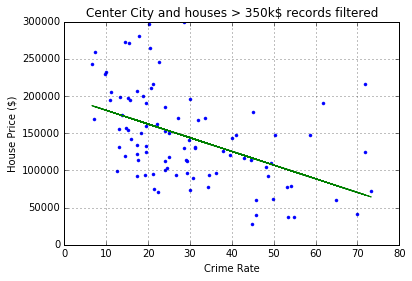

In [40]:
sales_nohighend = sales_noCC[sales_noCC['HousePrice'] < 350000]
xi = sales_nohighend[features]
A = array([xi, ones(xi.size)])
y = sales_nohighend[target]
w = linalg.lstsq(A.T, y)[0]
print("Linear regression model calculated for file %s.\n------------------------\nResults:" % (sourcefile))
print("Slope:\t\t%f" %(w[0]))
print("Intercept:\t%d" %(w[1]))
print("Note: Center City and houses > 350k$ records filtered")
print("------------------------")

plt.plot(sales_nohighend[features],sales_nohighend[target],".",
         sales_nohighend[features],w[1]+w[0]*sales_nohighend[features],"g-",)
plt.xlabel('Crime Rate')
plt.ylabel('House Price ($)')
plt.title('Center City and houses > 350k$ records filtered')
plt.grid(True)


plt.show()